In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/sampleSubmission.csv')

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [8]:
print(submission.shape)
submission.head()

(884262, 40)


,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
train['Dates'] = pd.to_datetime(train['Dates'])

train['Year'] = train['Dates'].dt.year
train['Month'] = train['Dates'].dt.month
train['Day'] = train['Dates'].dt.day
train['Hour'] = train['Dates'].dt.hour
train['Minute'] = train['Dates'].dt.minute
train['Second'] = train['Dates'].dt.second
train['DayOfWeek'] = train['Dates'].dt.dayofweek

test['Dates'] = pd.to_datetime(test['Dates'])

test['Year'] = test['Dates'].dt.year
test['Month'] = test['Dates'].dt.month
test['Day'] = test['Dates'].dt.day
test['Hour'] = test['Dates'].dt.hour
test['Minute'] = test['Dates'].dt.minute
test['Second'] = test['Dates'].dt.second
test['DayOfWeek'] = test['Dates'].dt.dayofweek

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


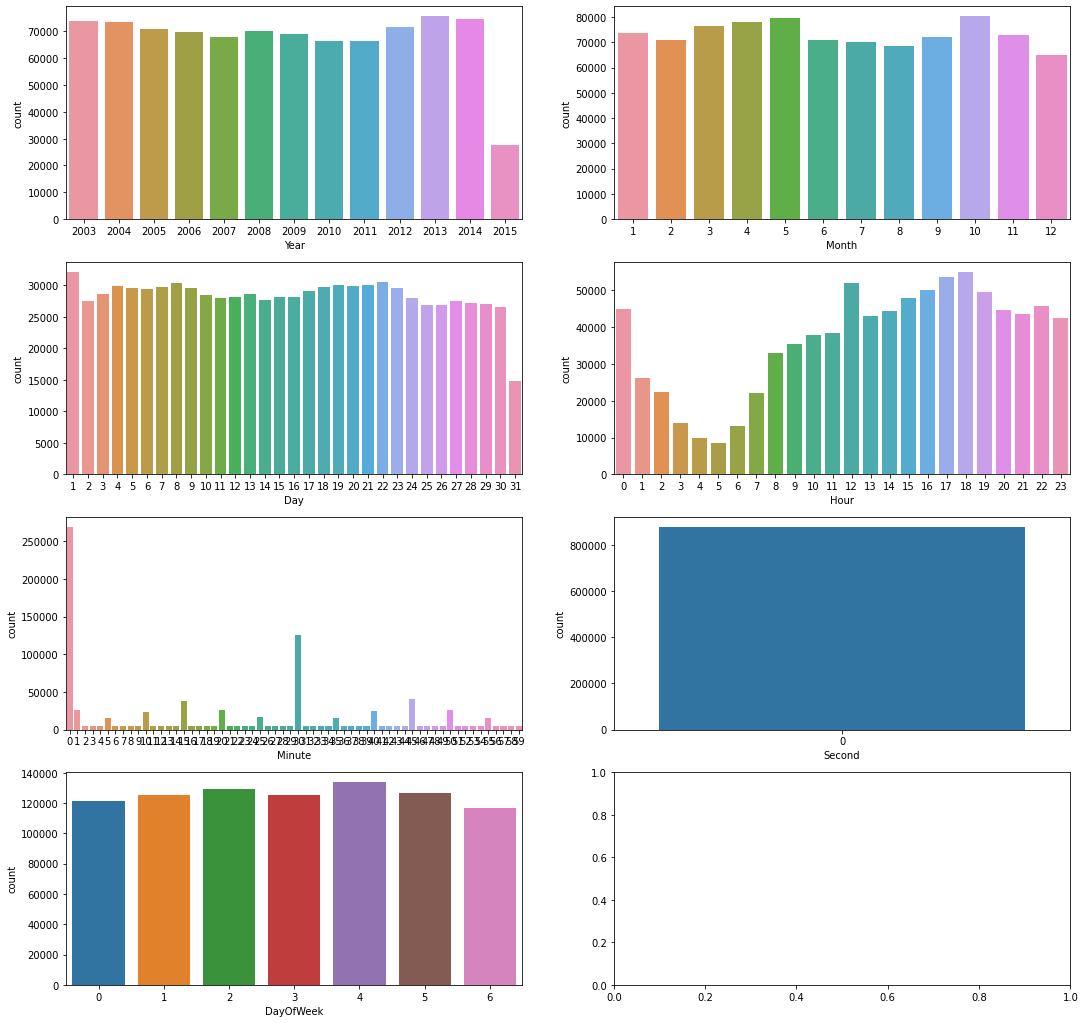

In [11]:
figure, ((ax01, ax02), (ax03, ax04), (ax11, ax12), (ax13, ax14)) = plt.subplots(nrows=4, ncols=2)

figure.set_size_inches(18, 18)


sns.countplot(data=train, x='Year', ax=ax01)
sns.countplot(data=train, x='Month', ax=ax02)
sns.countplot(data=train, x='Day', ax=ax03)
sns.countplot(data=train, x='Hour', ax=ax04)
sns.countplot(data=train, x='Minute', ax=ax11)
sns.countplot(data=train, x='Second', ax=ax12)
sns.countplot(data=train, x='DayOfWeek', ax=ax13)

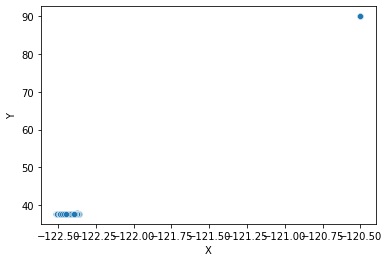

In [12]:
sns.scatterplot(data=train, x='X', y='Y')

(67, 15)


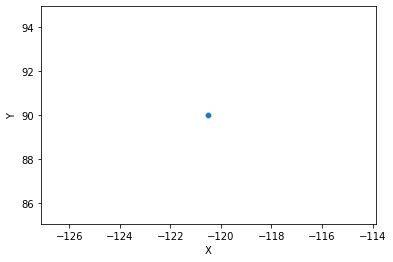

In [5]:
outlier = train[((train['X'] == train['X'].max()) | (train['Y'] == train['Y'].max()))]

print(outlier.shape)
sns.scatterplot(data=outlier, x='X', y='Y')

(877982, 15)


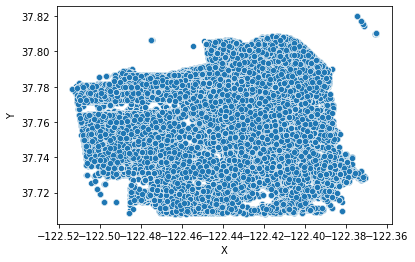

In [6]:
nonOutlier = train[~((train['X'] == train['X'].max()) | (train['Y'] == train['Y'].max()))]

print(nonOutlier.shape)
sns.scatterplot(data=nonOutlier, x='X', y='Y')

In [7]:
category_list = train['Category'].unique()
print(train['Category'].value_counts().index)
category_list

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY', 'SEX OFFENSES FORCIBLE',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'RECOVERED VEHICLE', 'KIDNAPPING',
       'DRIVING UNDER THE INFLUENCE', 'RUNAWAY', 'LIQUOR LAWS', 'ARSON',
       'LOITERING', 'EMBEZZLEMENT', 'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS',
       'BRIBERY', 'EXTORTION', 'SEX OFFENSES NON FORCIBLE', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype='object')


array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [8]:
print('category_list : '+(str)(len(category_list)))
print('train[\'Category\'] : '+(str)(len(train['Category'])))

category_list : 39
train['Category'] : 878049


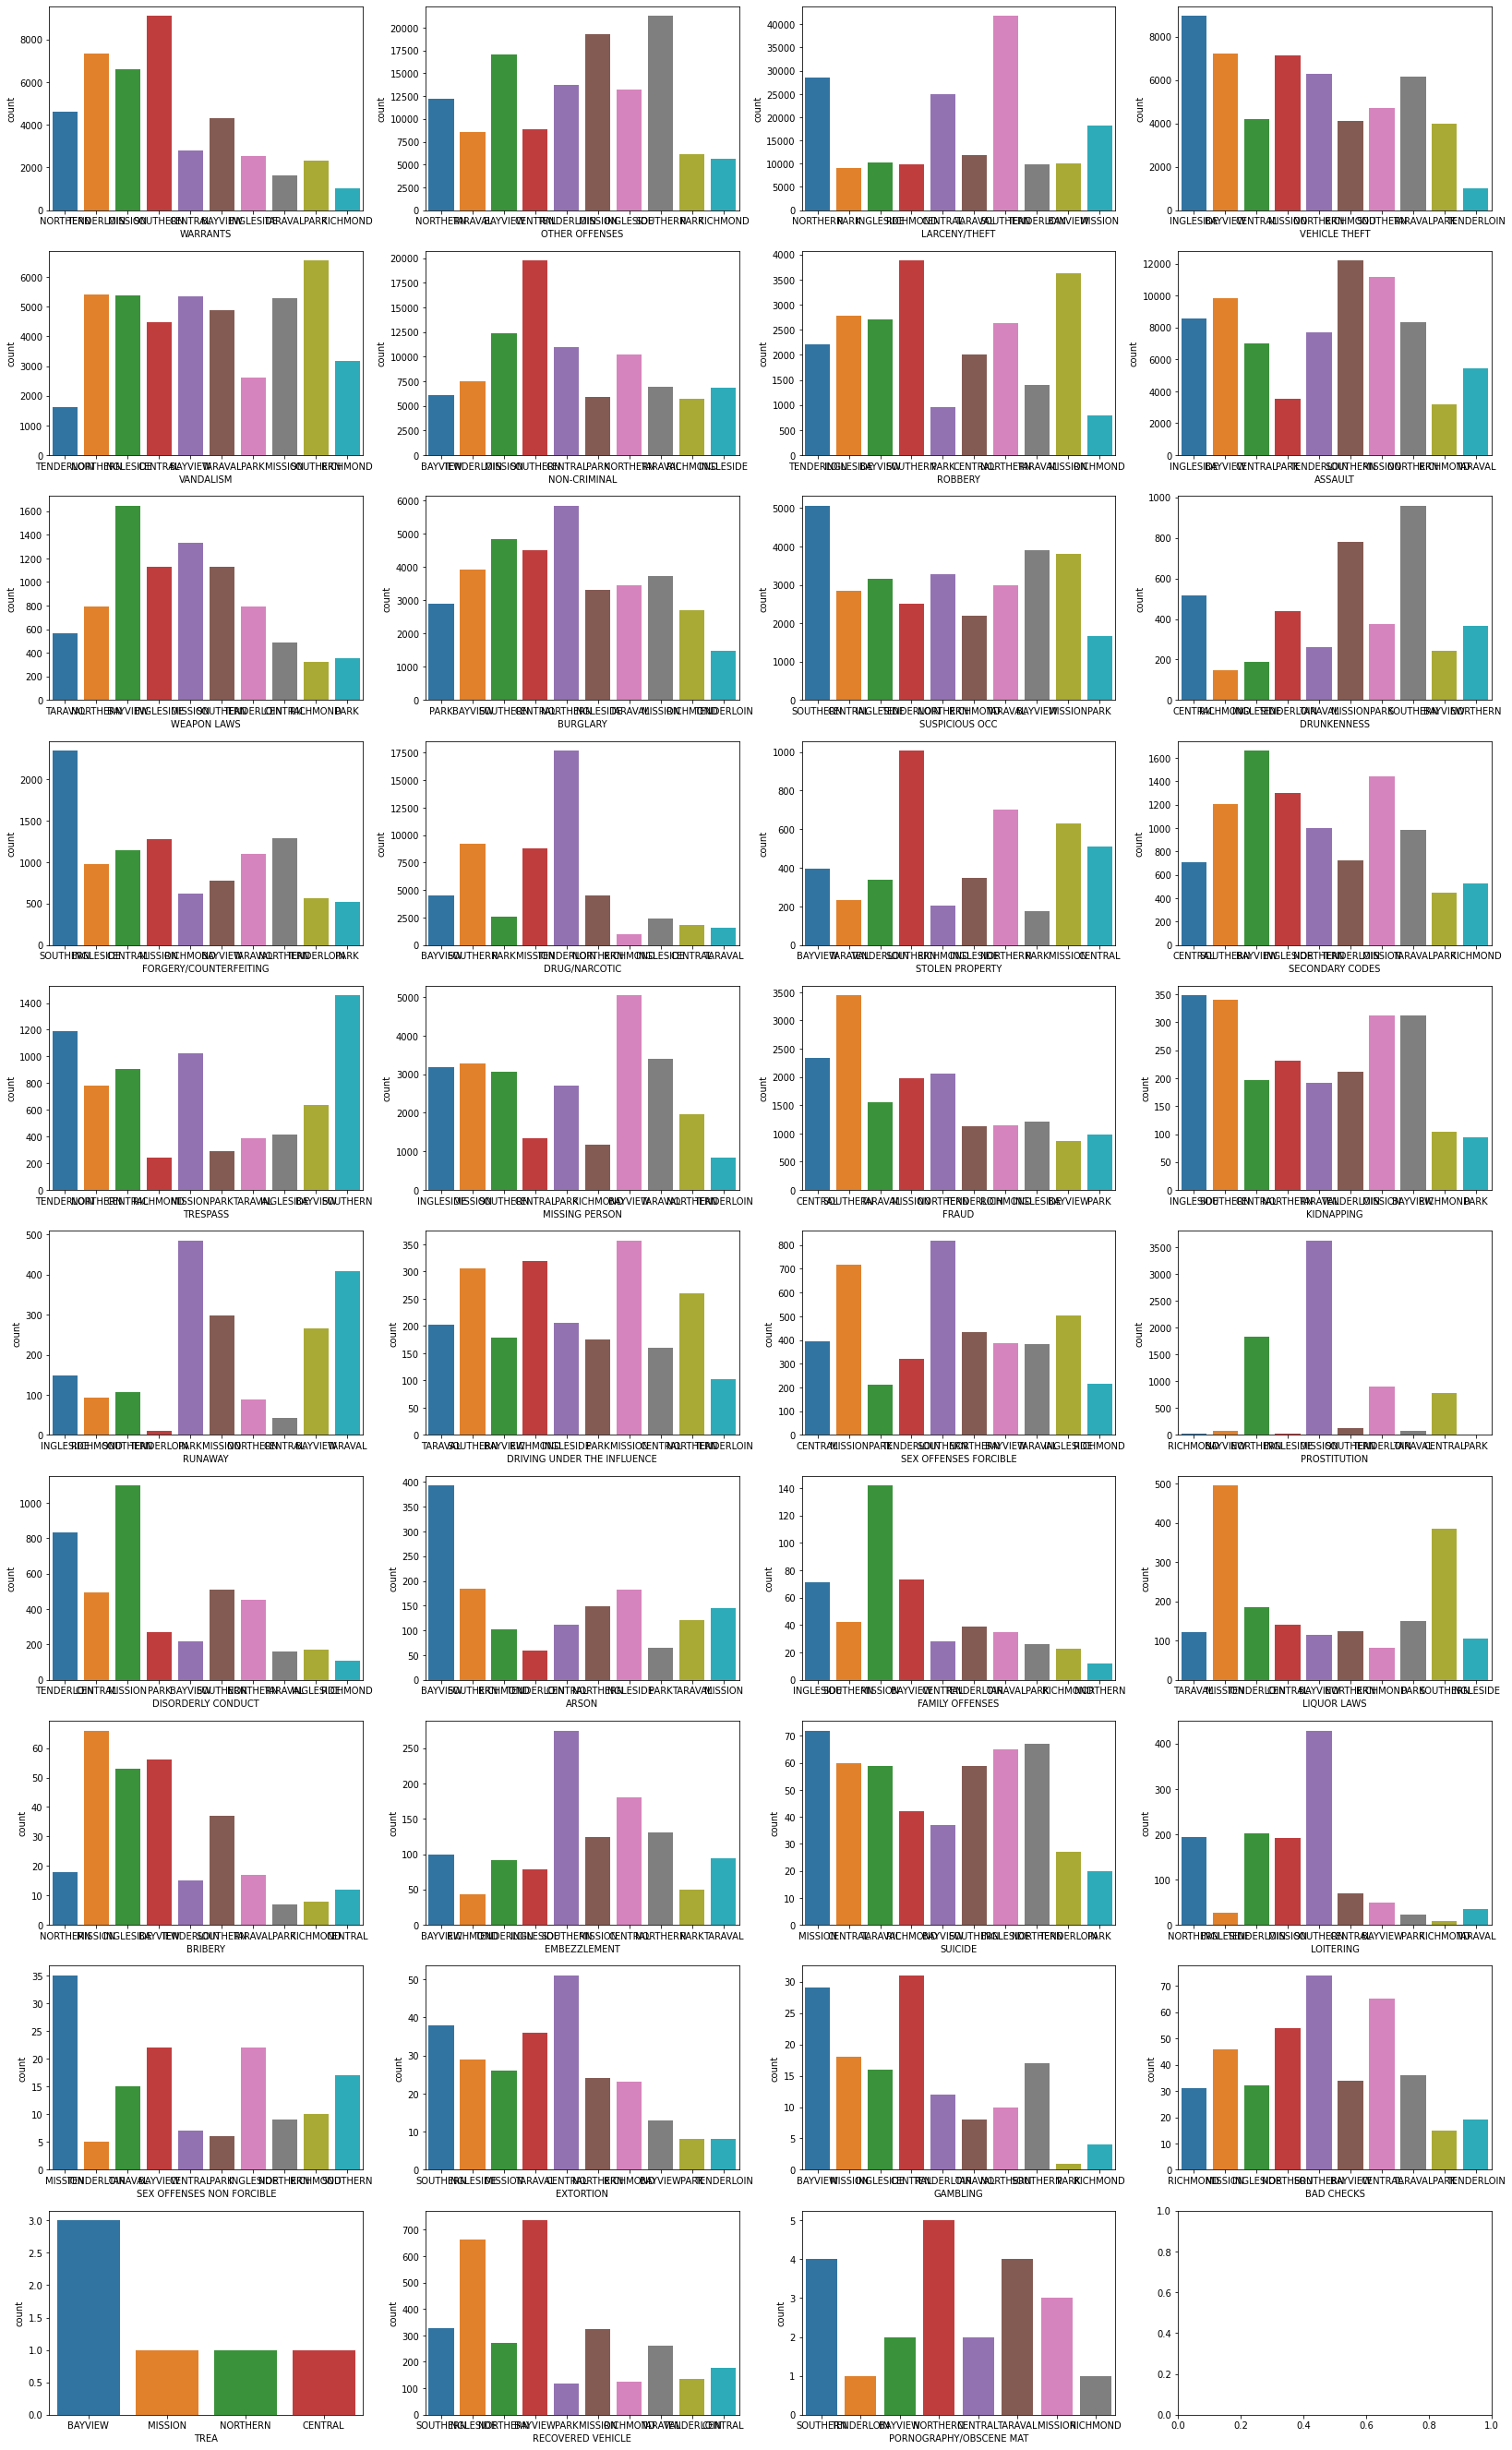

In [9]:
figure, axes = plt.subplots(nrows=10, ncols=4)
figure.set_size_inches(28, 48)

count = 0

for i in range(10):
    for j in range(4):
        ax = axes[i][j]
        
        graph = train[train['Category'] == category_list[count]]
        sns.countplot(data=graph, x='PdDistrict', ax=ax)
        ax.set(xLabel = category_list[count])
        count+=1
        if len(category_list) <= count:
            break
        

In [ ]:
train.columns

In [ ]:
train['DayOfWeek'].unique()

In [ ]:
train["PdDistrict"].unique()

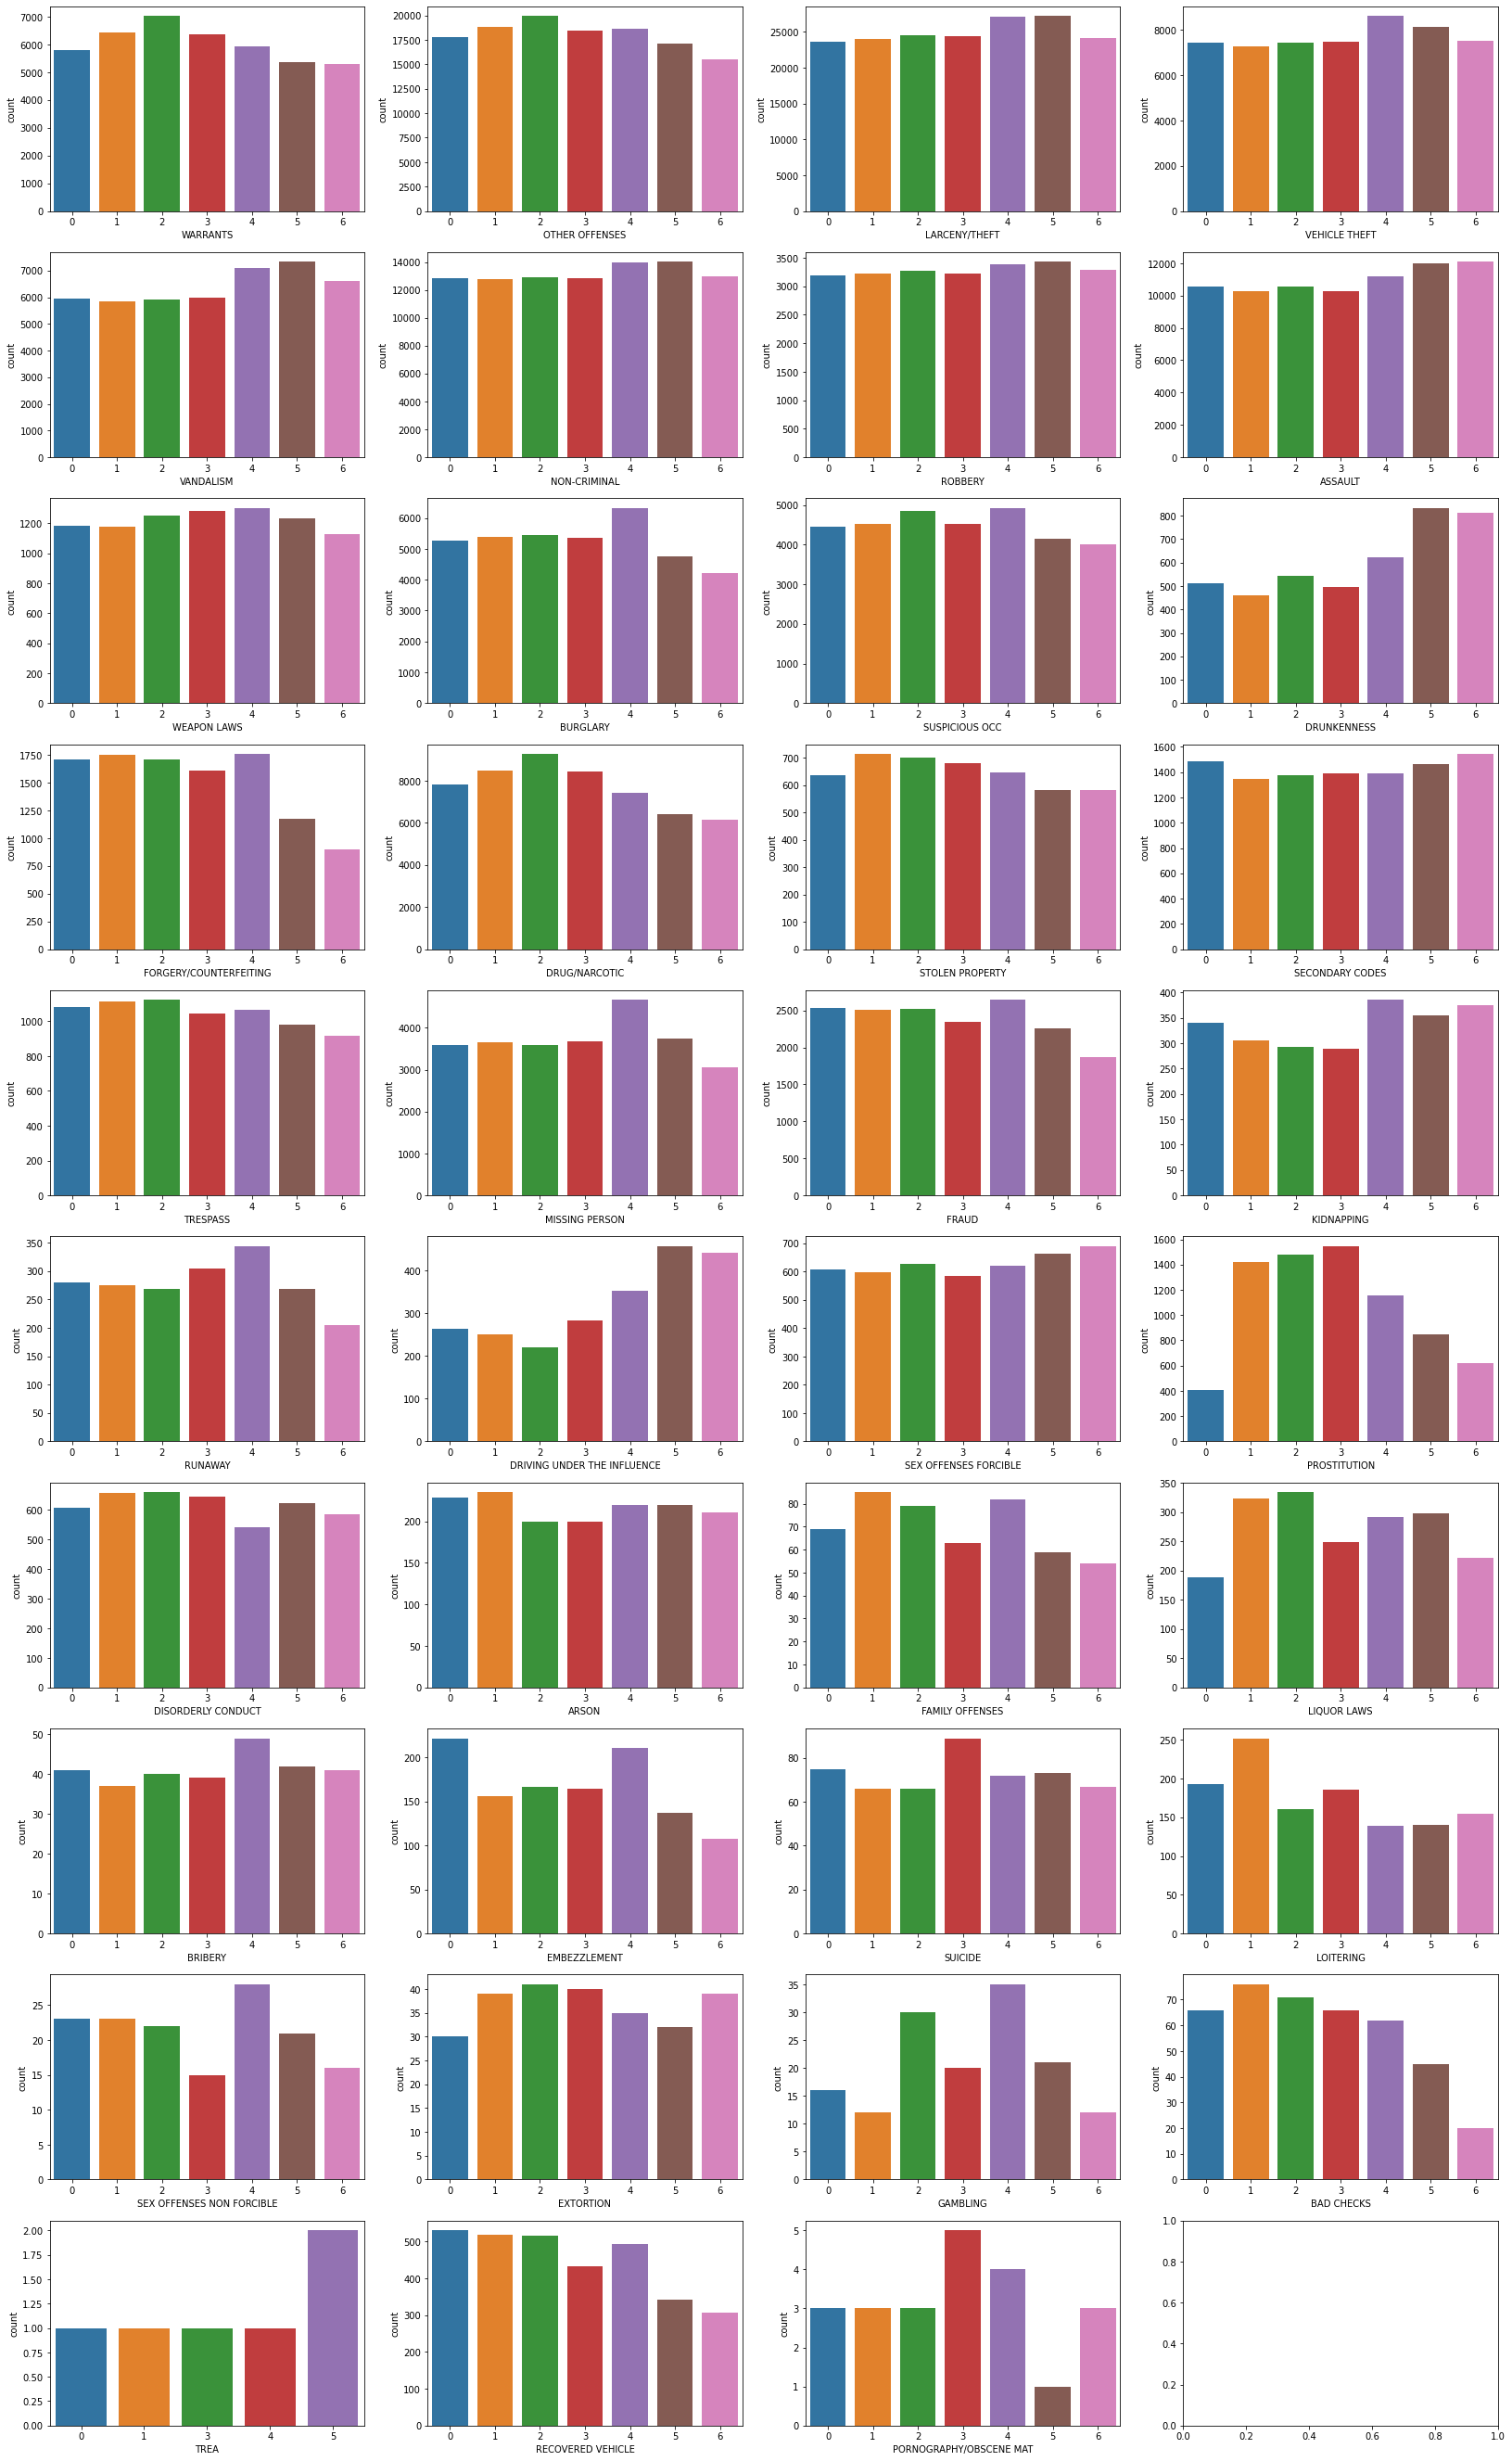

In [10]:
figure, axes = plt.subplots(nrows=10, ncols=4)
figure.set_size_inches(28, 48)
idx = 0

for i in range(10):
    for j in range(4):
        ax = axes[i][j]
        
        graph = train[train['Category'] == category_list[idx]]
        sns.countplot(data=graph, x='DayOfWeek', ax=ax)
        ax.set(xLabel=category_list[idx])
        idx+=1
        if idx >= len(category_list):
            break

In [ ]:
print(train.columns)
train["PdDistrict"].unique()

In [11]:
import numpy as np

p_list = ['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN']

for i in p_list:
    train[i+'(oh)'] = train['PdDistrict'] == i
    
    
for i in p_list:
    test[i+'(oh)'] = test['PdDistrict'] == i
    
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second,NORTHERN(oh),PARK(oh),INGLESIDE(oh),BAYVIEW(oh),RICHMOND(oh),CENTRAL(oh),TARAVAL(oh),TENDERLOIN(oh),MISSION(oh),SOUTHERN(oh)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,True,False,False,False,False,False,False,False,False,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,True,False,False,False,False,False,False,False,False,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,True,False,False,False,False,False,False,False,False,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,True,False,False,False,False,False,False,False,False,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,False,True,False,False,False,False,False,False,False,False


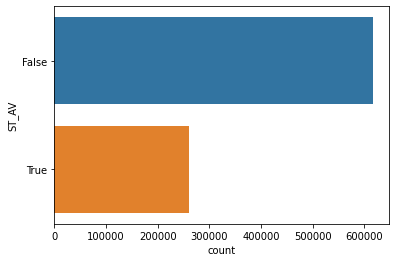

In [12]:
train['ST_AV'] = train['Address'].str.contains('/')

test['ST_AV'] = test['Address'].str.contains('/')

sns.countplot(data=train, y='ST_AV')

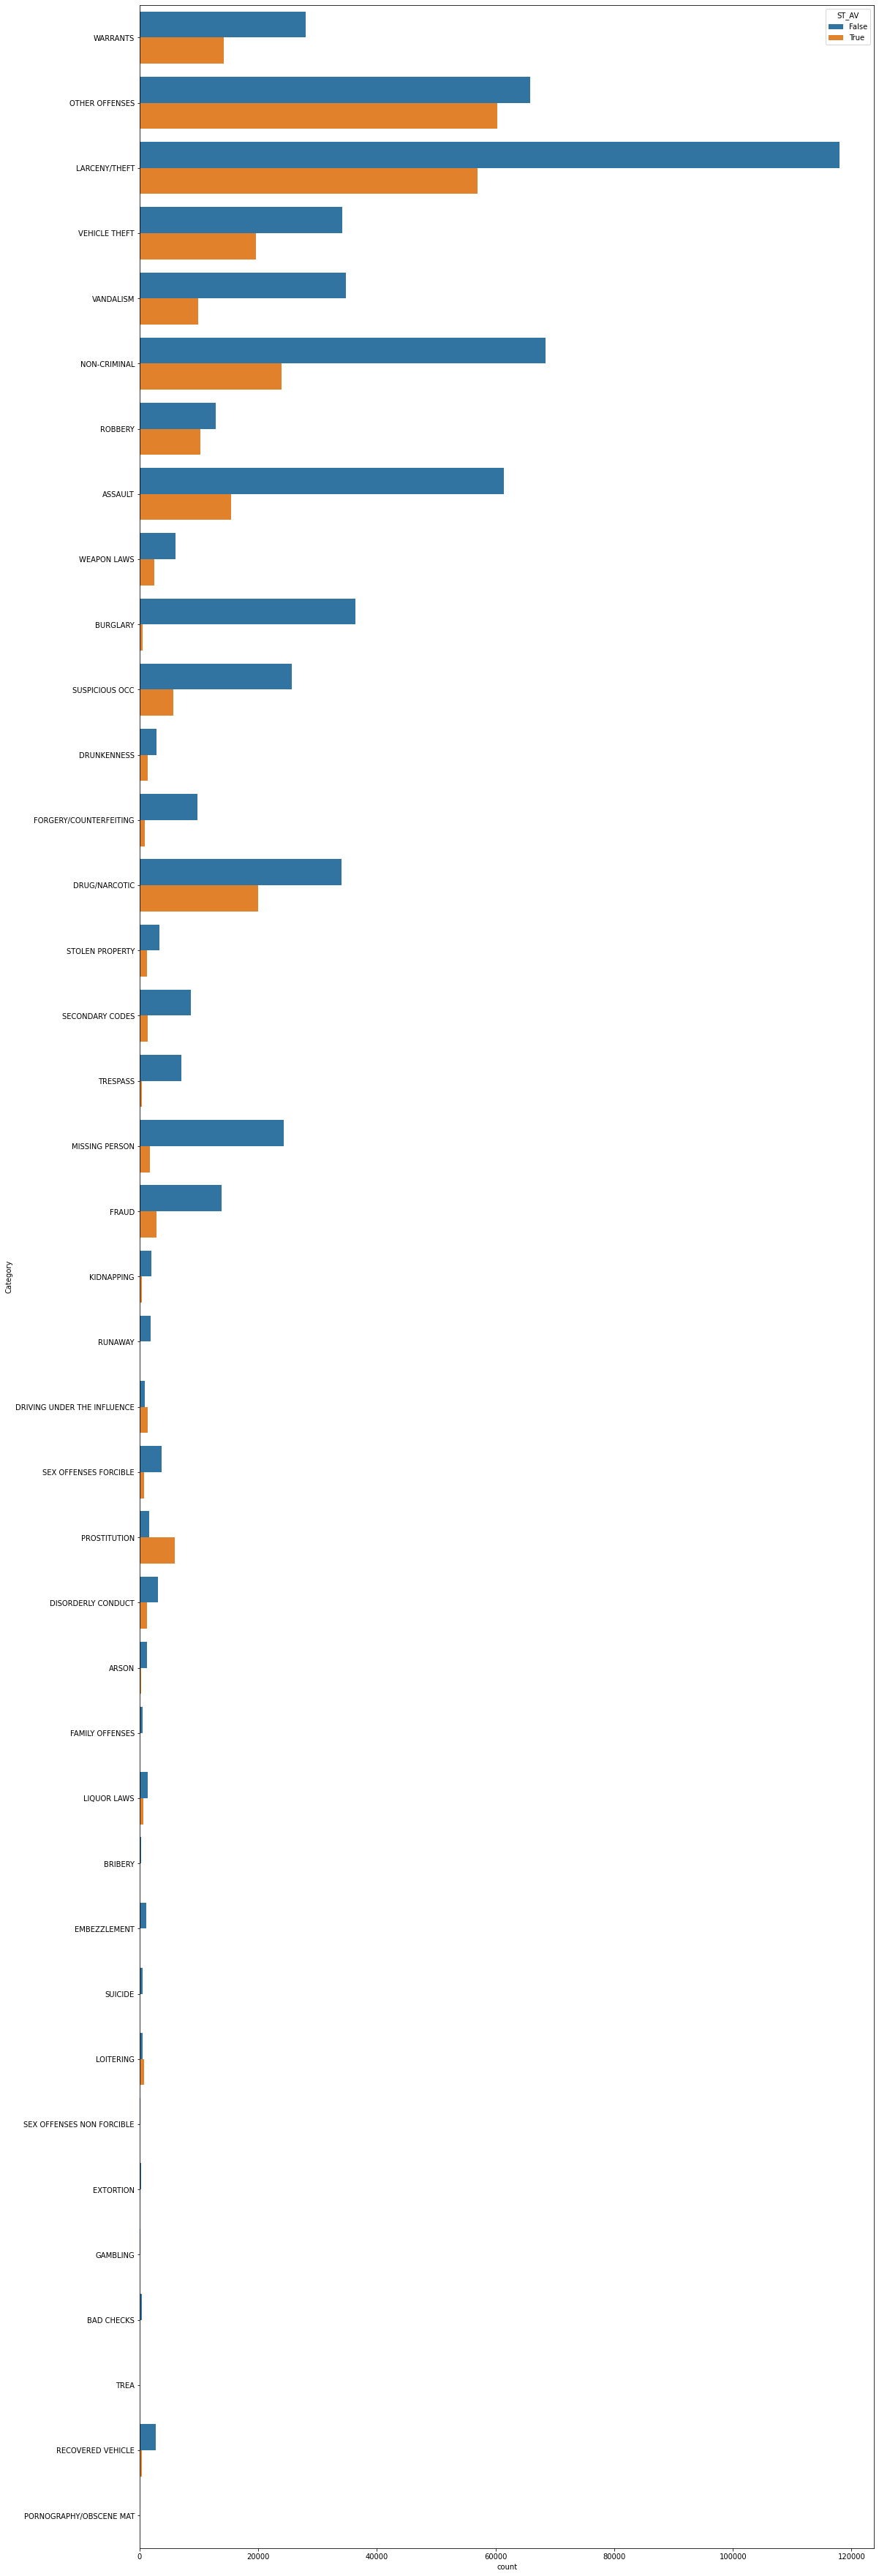

In [13]:
plt.figure(figsize = (18, 64))
sns.countplot(data=train, y='Category', hue='ST_AV')

In [ ]:
#import folium
#folium.Map(location = [non_outlier["Y"].mean(), non_outlier["X"].mean()], zoom_start = 12)

In [ ]:
train.columns

In [14]:
features_names = ['X', 'Y', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Second', 'NORTHERN(oh)', 'PARK(oh)', 'INGLESIDE(oh)',
       'BAYVIEW(oh)', 'RICHMOND(oh)', 'CENTRAL(oh)', 'TARAVAL(oh)',
       'TENDERLOIN(oh)', 'MISSION(oh)', 'SOUTHERN(oh)', 'ST_AV']
results_names = ['Category']

train_x = train[features_names]
train_y = train[results_names]

test_x = test[features_names]

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier(n_estimators = 5, n_jobs = -1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [17]:
rf_clf.fit(train_x, train_y)
pred = rf_clf.predict(test_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [31]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/sampleSubmission.csv')

In [32]:
for idx in range(0, len(pred)):
  submission[pred[idx]][idx] = 1

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
submission.set_index('Id')
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/SanFrancisco Crime/submission.csv', index=False)